### 1.
There is only one possible roll that gives snake eyes out of a total 36 possibilties, giving a probability of 2.78%. To get 7, there are six possible rolls: 1+6, 2+5, 3+4, 4+3, 5+2, or 6+1. This gives a probability of 16.67%. The ratio of the probabilities is $\frac{P(roll=7)}{P(roll=2)}=6$, as there's 6 times as many possibilities that give a roll of 7 as there are for a roll of 2.

### 2.
By counting the number of possible outcomes, the probabilities of the sum of two dice are:

2 (1+1): 
1/36 = 0.0278

3 (1+2, 2+1): 
2/36 = 0.0556

4 (1+3, 2+2, 3+1): 
3/36 = 0.0833

5 (1+4, 2+3, 3+2, 4+1): 
4/36 = 0.1111

6 (1+5, 2+4, 3+3, 4+2, 5+1): 
5/36 = 0.1389

7 (1+6, 2+5, 3+4, 4+3, 5+2, 6+1): 
6/36 = 0.1667

8 (2+6, 3+5, 4+4, 5+3, 6+2): 
5/36 = 0.1389

9 (3+6, 4+5, 5+4, 6+3): 
4/36 = 0.1111

10 (4+6, 5+5, 6+4): 
3/36 = 0.0833

11 (5+6, 6+5): 
2/36 = 0.0556

12 (6+6): 
1/36 = 0.0278

To get the sum of the two dice numerically, we convolute the function for a die with itself. The function for the probability of a single six-sided die is $f(x) = 1/6$ for $1\le x \le6$

Probability of rolling 2: 0.0278
Probability of rolling 3: 0.0556
Probability of rolling 4: 0.0833
Probability of rolling 5: 0.1111
Probability of rolling 6: 0.1389
Probability of rolling 7: 0.1667
Probability of rolling 8: 0.1389
Probability of rolling 9: 0.1111
Probability of rolling 10: 0.0833
Probability of rolling 11: 0.0556
Probability of rolling 12: 0.0278


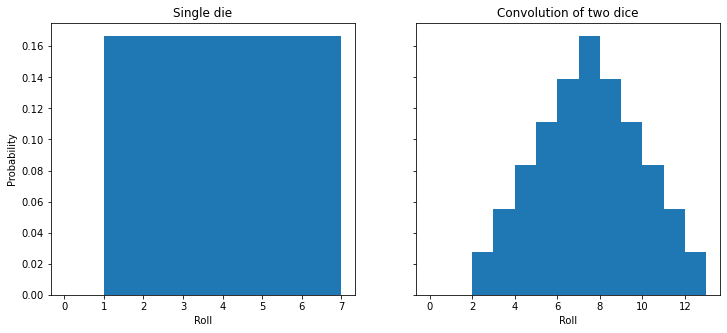

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function for the probability of a die roll
def dice(x):
    if (x>=1) and (x<=6):
        return 1/6
    else:
        return 0

# Iterate the function over the range of possible values
d1 = [dice(x) for x in range(7)]

d2 = np.convolve(d1,d1)

for n in range(2,13):
    print(f'Probability of rolling {n}: {d2[n]:0.4f}')

fig,ax = plt.subplots(1,2, figsize=(12,5), sharey=True)
ax[0].stairs(d1,fill=True)
ax[0].set_title('Single die')
ax[0].set_ylabel('Probability')
ax[0].set_xlabel('Roll')
ax[1].stairs(d2,fill=True)
ax[1].set_title('Convolution of two dice')
ax[1].set_xlabel('Roll')
plt.show()

### 3.
To get the mean, we add up all of the possible values rolled and divide by the total number. This means we need each sum for each combination, not just one of each value, so one 2, two 3s, three 4s, etc.
To find the variance, we take each possible roll, subtract the mean, square, and multiply by the probability of getting that roll, and sum them together.

In [4]:
d = [2, 3,3, 4,4,4, 5,5,5,5, 6,6,6,6,6, 7,7,7,7,7,7, 8,8,8,8,8, 9,9,9,9, 10,10,10, 11,11, 12]

mean = np.sum(d)/(len(d))

var = 0
for n in range(2,13):
    result = (n - mean)**2 * d2[n]
    var += result

print(f'The mean is {mean} and the variance is {var:.3f}')

The mean is 7.0 and the variance is 5.833


### 4.
For convoluting more than two distributions, we can convolute the the first two, then convolute with the next, and repeat until we've convoluted all of them. This gives us the sum, which we divide by the number of distributions we convoluted to get the average of the distributions.

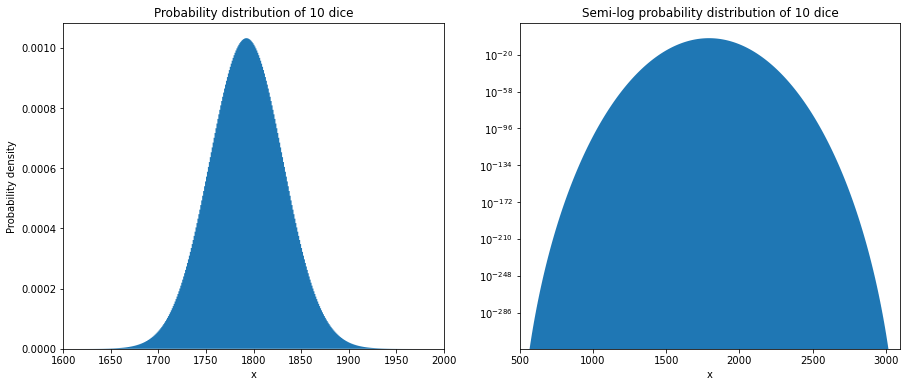

In [5]:
from scipy import stats

d = d1
for n in range(9):
    d = np.convolve(d,d)
d= d/10
fig, ax = plt.subplots(1,2,figsize=(15,6))
ax[0].stairs(d, fill=True)
ax[0].set_xlim(1600,2000)
ax[0].set_ylabel('Probability density')
ax[0].set_xlabel('x')
ax[1].set_xlabel('x')
ax[0].set_title('Probability distribution of 10 dice')
ax[1].stairs(d, fill=True)
ax[1].set_title('Semi-log probability distribution of 10 dice')
ax[1].set_yscale('log')
ax[1].set_xlim(500,3100)
plt.show()

This distribution is not Gaussian, since it's still discrete, but it approximates a Gaussian distribution, with a better approximation the more dice are rolled. At this scale, the distribution looks like it has the parabolic shape of a Gaussian distrbution on a semi-log plot.

### 5.

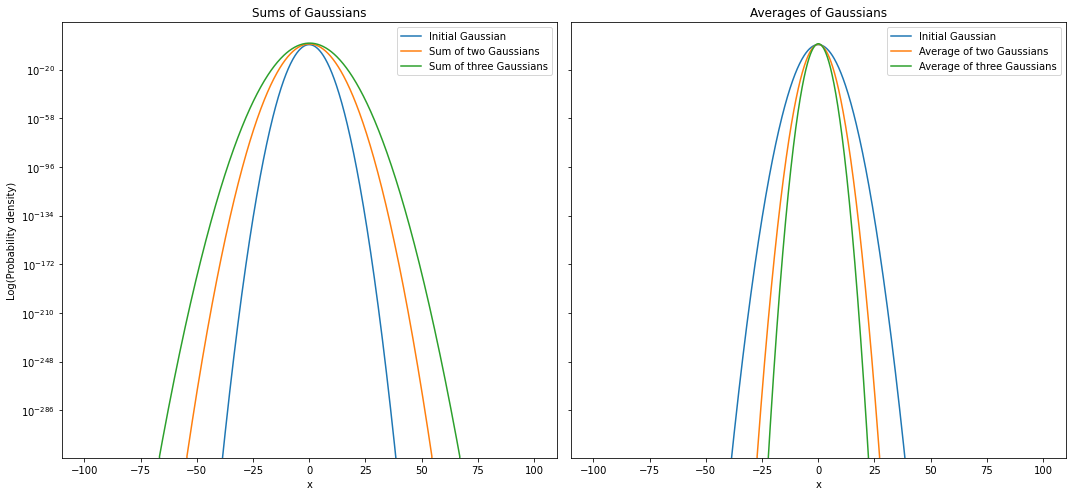

In [21]:
x = np.linspace(-100,100,1000)
g = stats.norm.pdf(x, loc=0, scale=1)

g_sum1 = np.convolve(g,g, mode='same')
g_sum2 = np.convolve(g_sum1, g, mode='same')

g_ave1 = g_sum1/2
g_ave2 = g_sum2/3

fig, ax = plt.subplots(1,2, figsize=(15,7), sharey=True)
ax[0].set_ylabel('Log(Probability density)')
ax[0].set_xlabel('x')
ax[1].set_xlabel('x')

ax[0].plot(x, g, label='Initial Gaussian')
ax[0].plot(x, g_sum1, label='Sum of two Gaussians')
ax[0].plot(x, g_sum2, label='Sum of three Gaussians')
ax[0].set_yscale('log')
ax[0].legend()
ax[0].set_title('Sums of Gaussians')

ax[1].set_title('Averages of Gaussians')
ax[1].plot(x, g, label='Initial Gaussian')
ax[1].plot(x/2, g_ave1, label='Average of two Gaussians')
ax[1].plot(x/3, g_ave2, label='Average of three Gaussians')
ax[1].legend()
plt.tight_layout()
plt.show()

All of these distributions remain Gaussian after convolving, as they match the characteristic parabolic shape on the semi-log plot. The mean value of all of them remains the same, as it's the same Gaussian being added and averaged with itself. For the sums, the standard deviation increases as more are added, but it decreases when averaged.

The implication of this is that taking many measurements decrease their deviation, which decreases the chances that signal candidates are noise.